# **Imports and checking dataframe**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_august = pd.read_csv('C:/Users/Utilizador/Documents/GitHub/wild-git/Hackathon-Mano-Mano/August.csv')
df_september = pd.read_csv('C:/Users/Utilizador/Documents/GitHub/wild-git/Hackathon-Mano-Mano/September.csv')
df_october = pd.read_csv('C:/Users/Utilizador/Documents/GitHub/wild-git/Hackathon-Mano-Mano/October.csv')
df_november = pd.read_csv('C:/Users/Utilizador/Documents/GitHub/wild-git/Hackathon-Mano-Mano/November.csv')

C:\Users\Utilizador\anaconda3\envs\Safe space\lib\site-packages\IPython\core\interactiveshell.py:3172: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_november.columns

Index(['id', 'comment', 'original_comment', 'score', 'data_scale',
       'data_source', 'created_at', 'date', 'day', 'month', 'is_mf', 'device',
       'family', 'is_b2b', 'reason', 'browser', 'category', 'language',
       'platform', 'provider', 'first_order', 'nb_articles', 'csat_presales',
       'shipping_fees', 'bv_transaction', 'payment_method', 'operating_system',
       'last_paid_channel', 'has_presales_contact', 'shipping_fees_bucket',
       'bv_transaction_bucket', 'has_manodvisor_contact', 'themes', 'tags'],
      dtype='object')

In [20]:
df_november.sort_values(by=['bv_transaction'], ascending = False).head()

,id,comment,original_comment,score,data_scale,data_source,created_at,date,day,month,...,bv_transaction,payment_method,operating_system,last_paid_channel,has_presales_contact,shipping_fees_bucket,bv_transaction_bucket,has_manodvisor_contact,themes,tags
2744,349376886,NaN,NaN,8,NPS,Customer Effort Score,2021-11-03T18:47:40.000Z,2021-11-03,Wednesday,November,...,6207.95,visa,Mac OS X 10.15.7,SEM,False,101 - 500,2000 +,False,NaN,NaN
31578,369052499,NaN,NaN,10,NPS,Customer Effort Score,2021-11-29T19:53:25.000Z,2021-11-29,Monday,November,...,5486.28,visa,Windows 10,SEM,False,20 - 50,2000 +,False,NaN,NaN
8271,355257735,NaN,NaN,8,NPS,Customer Effort Score,2021-11-09T12:44:04.000Z,2021-11-09,Tuesday,November,...,4929.08,transfer,Windows 10,NaN,False,51 - 100,2000 +,False,NaN,NaN
8066,355260060,NaN,NaN,10,NPS,Customer Effort Score,2021-11-09T09:15:10.000Z,2021-11-09,Tuesday,November,...,4928.88,visa,Mac OS X 10.14.6,EMAIL,False,51 - 100,2000 +,False,NaN,NaN
3731,349377920,NaN,NaN,10,NPS,Customer Effort Score,2021-11-04T18:47:01.000Z,2021-11-04,Thursday,November,...,4754.00,visa,iOS 14.8,DIRECT_ACCESS,False,0,2000 +,False,NaN,NaN


In [8]:
df_november[df_november['has_manodvisor_contact'] == True].sort_values(by = ['bv_transaction'], ascending=False).head()

,id,comment,original_comment,score,data_scale,data_source,created_at,date,day,month,...,bv_transaction,payment_method,operating_system,last_paid_channel,has_presales_contact,shipping_fees_bucket,bv_transaction_bucket,has_manodvisor_contact,themes,tags
30958,369043447,NaN,NaN,0,NPS,Customer Effort Score,2021-11-29T14:22:05.000Z,2021-11-29,Monday,November,...,3448.50,transfer,Windows 10,NaN,False,0,2000 +,True,NaN,Detractor '- Difficulty Paying
27061,362422630,NaN,NaN,9,NPS,Customer Effort Score,2021-11-26T15:21:44.000Z,2021-11-26,Friday,November,...,909.30,mastercard,Windows 10,SHOPBOT,False,0,801 - 1000,True,NaN,NaN
27642,362424637,NaN,NaN,10,NPS,Customer Effort Score,2021-11-26T22:02:28.000Z,2021-11-26,Friday,November,...,449.34,mastercard,Windows 10,DIRECT_ACCESS,False,0,401 - 500,True,NaN,NaN
10221,355269076,NaN,NaN,10,NPS,Customer Effort Score,2021-11-11T12:35:05.000Z,2021-11-11,Thursday,November,...,440.24,visa,Windows 10,SHOPBOT,False,20 - 50,401 - 500,True,NaN,NaN
23176,362417503,NaN,NaN,8,NPS,Customer Effort Score,2021-11-23T13:50:11.000Z,2021-11-23,Tuesday,November,...,394.96,paypal,Windows 10,DIRECT_ACCESS,True,101 - 500,301 - 400,True,NaN,NaN


In [11]:
#Creating a dataframe for the heatmap
df_heatmap = df_november.copy()
df_heatmap['is_b2b'] = df_heatmap['is_b2b'].factorize()[0]
df_heatmap = pd.get_dummies(df_heatmap, columns = ['device'])

In [16]:
df_heatmap.is_b2b.value_counts()               #0 for False, 1 for True, -1 for Nan

 0    26516
 1     5937
-1      547
Name: is_b2b, dtype: int64

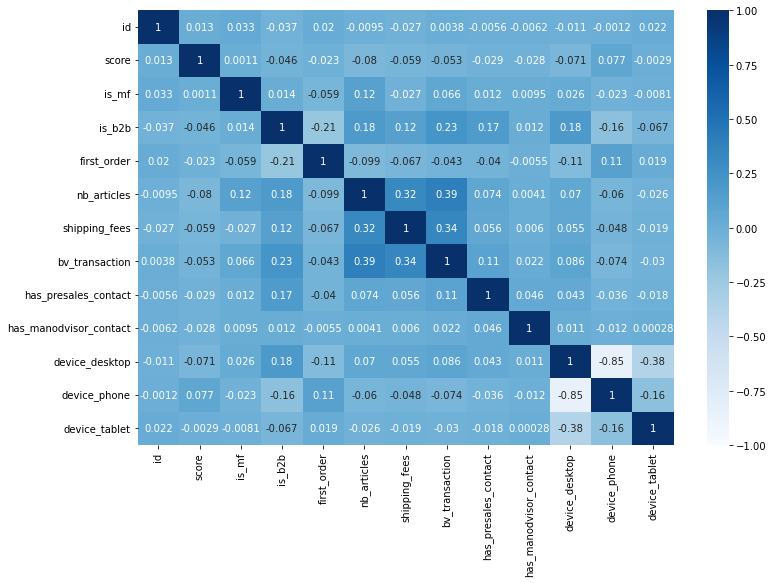

In [22]:
#Heatmap is here

plt.figure(figsize =  (12,8))
sns.heatmap(df_heatmap.corr(), center = 0, vmin = -1, cmap = 'Blues', annot = True)
plt.show()

# **Data Viz**

## Most sold category

In [42]:
df_november['category'].value_counts(dropna = False).head()
#1 - Heating and air conditioning
#2 - Workshop equipment and storage
#3 - Power tools
#4 - Indoor lighting
#5 - Décor

Chauffage et climatisation              1935
Matériel et aménagement de l'atelier    1874
Outillage électroportatif               1414
Eclairage d'intérieur                   1333
Décoration                              1215
Name: category, dtype: int64

In [28]:
df_november['category'].value_counts(dropna = False).tail()

Reptiles et insectes pour terrarium    6
NaN                                    5
Apiculture                             4
Réseaux                                3
Cuisine et accessoire                  3
Name: category, dtype: int64

In [53]:
df_november['family'].value_counts(dropna = False)

Outillage                 6959
Mobilier d'intérieur      5771
Jardin piscine            5081
Plomberie chauffage       3018
Luminaire                 2655
Electricité               2300
Salle de bain, WC         2290
Quincaillerie             2224
Animalerie                 784
Cuisine                    746
Revêtement sol et mur      729
Construction matériaux     438
NaN                          5
Name: family, dtype: int64

## Most common complaints

In [30]:
df_november['reason'].value_counts().head()
#1 - Shipping fees too expensive
#2 - Difficulty in registering/signing up
#3 - Difficulties in payment with the proposed payment methods
#4 - Ran out of options for delivery
#5 - I couldn't easily find the products I was looking for

J’ai trouvé que les frais de port étaient trop chers                    192
J’ai eu des difficultés à m'inscrire ou à me connecter                  143
J'ai eu des difficultés à payer avec les moyens de paiement proposés    104
J’ai manqué d’options pour me faire livrer                               94
Je n’ai pas trouvé facilement les produits que je cherchais              85
Name: reason, dtype: int64

In [39]:
df_comments1 = pd.DataFrame(df_november['comment'][df_november['reason'] == 'J’ai trouvé que les frais de port étaient trop chers'])

In [40]:
df_comments1.dropna() 

,comment
211,I found it difficult to find complementary or ...
409,I had trouble using my promo code.
456,Free shipping!!! upon arrival 9€ delivery for ...
677,relay point as expensive as home
813,Shipping costs for each item please combine th...
884,I had difficulty registering or logging in
968,I ran out of options to get delivered.
5824,I ran out of product information.
6112,During the first searches it is specified free...
6322,I had difficulty registering or logging in


In [38]:
df_comments2 = pd.DataFrame(df_november['comment'][df_november['reason'] == "J’ai eu des difficultés à m'inscrire ou à me connecter"])

In [41]:
df_comments2.dropna()

,comment
691,The registration did not work in pro account. ...
728,password problem
929,Long and complicated
1366,"Not used to ordering online, I thought my pass..."
1466,For Mano Mano the overseas departments do not ...
5786,I thought shipping costs were too expensive.
6464,It's a long time.
6510,Very difficult to find how to create an accoun...
7465,More than waiting for delivery
13218,Difficulties changing delivery address


In [ ]:
#From these two comments sections we can see that people didn't really place their comments under the correct section, 
#seeings as there are several "shipping costs too expensive" comments in the section "had trouble signing up"

In [79]:
print(df_november['shipping_fees'].mean())
df_november['shipping_fees'].value_counts()

5.003353333333333


0.00     18490
5.90       612
6.90       405
4.90       384
4.95       352
         ...  
32.34        1
7.27         1
55.75        1
15.91        1
32.40        1
Name: shipping_fees, Length: 1614, dtype: int64

## Days with most sells

In [45]:
df_november['day'].value_counts(dropna = False)
#There is somewhat of a trend to buy on the beggining/start of the week(Sunday - Tuesday), Monday being the highest one.

Monday       6025
Tuesday      5432
Sunday       4704
Wednesday    4341
Friday       4304
Thursday     4251
Saturday     3943
Name: day, dtype: int64

## Most common country/language

In [46]:
df_november.columns

Index(['id', 'comment', 'original_comment', 'score', 'data_scale',
       'data_source', 'created_at', 'date', 'day', 'month', 'is_mf', 'device',
       'family', 'is_b2b', 'reason', 'browser', 'category', 'language',
       'platform', 'provider', 'first_order', 'nb_articles', 'csat_presales',
       'shipping_fees', 'bv_transaction', 'payment_method', 'operating_system',
       'last_paid_channel', 'has_presales_contact', 'shipping_fees_bucket',
       'bv_transaction_bucket', 'has_manodvisor_contact', 'themes', 'tags'],
      dtype='object')

In [48]:
df_november['language'].value_counts(dropna = False)
#The language is only detected when there is a written comment!

Unknown       30034
French         1091
Spanish         593
Italian         540
English         425
German          303
Portuguese        7
Catalan           4
Dutch             2
Turkish           1
Name: language, dtype: int64

In [49]:
df_november['platform'].value_counts(dropna = False)
#Most customers are French

FR    19758
IT     4962
ES     3393
GB     2911
DE     1976
Name: platform, dtype: int64

## Payment method / device

In [81]:
df_november['payment_method'].value_counts(dropna = False)

visa                12775
mastercard           9850
paypal               9153
payment-intent        567
oney3x                298
transfer              250
sofort                 89
deferred-payment       17
cb                      1
Name: payment_method, dtype: int64

In [82]:
df_november['device'].value_counts(dropna = True)
#Desktop is by far the most used device for connecting to the website(no surprise here), but there is also a considerable amount of people using
#their phones, meaning the website is definitely mobile-friendly.

desktop    22041
phone       8721
tablet      2238
Name: device, dtype: int64

In [83]:
df_november['browser'].value_counts(dropna = False)
#As expected, most customers use some version of Google Chrome to navigate the Mano-Mano website

Chrome 95.0.4638           6967
Chrome 96.0.4664           5157
Firefox 94.0               2649
Edge 95.0.1020             2219
Chrome Mobile 95.0.4638    2076
                           ... 
Google 85.0.274229539         1
Facebook 302.0.0              1
Facebook 321.0.0              1
Google 117.0.321844219        1
Facebook 337.0.0              1
Name: browser, Length: 327, dtype: int64

## B2B, Manodvisor, ManoFullfilment

In [50]:
df_november['is_b2b'].value_counts(dropna = False)
#Most of the orders are from customers and not companies

False    26516
True      5937
NaN        547
Name: is_b2b, dtype: int64

In [51]:
df_november['has_manodvisor_contact'].value_counts(dropna = False)
#the large majority of customers did not contact a Mano Mano advisor during their ordering experience

False    32957
True        43
Name: has_manodvisor_contact, dtype: int64

In [54]:
df_november['is_mf'].value_counts(dropna = False)
#Mano fullfilment

False    31151
True      1849
Name: is_mf, dtype: int64

## Does pre-sale influence the purchase?

In [56]:
df_november['has_presales_contact'].value_counts(dropna = False)

False    32651
True       349
Name: has_presales_contact, dtype: int64

In [57]:
df_november['csat_presales'].value_counts(dropna = False)
#although among the 3 opinions, good was the highest, most customers did not convey their opinion regarding satisfaction with pre-sale experience

FALSE      32941
good          44
neutral       11
bad            4
Name: csat_presales, dtype: int64

In [65]:
df_presales = df_november[['comment','score','bv_transaction']][df_november['has_presales_contact'] == True]
df_presales

,comment,score,bv_transaction
188,Great service and helpful,10,101.42
460,NaN,7,118.84
653,NaN,10,144.99
1049,NaN,10,268.39
1057,NaN,10,279.00
...,...,...,...
32639,NaN,10,287.00
32650,NaN,9,91.11
32673,NaN,9,146.50
32727,NaN,10,91.61


In [69]:
df_presales['score'].mean()

8.498567335243553

In [72]:
df_nopresales = df_november[['comment','score','bv_transaction']][df_november['has_presales_contact'] == False]

In [73]:
df_nopresales['score'].mean()

8.950782518146458

In [ ]:
#Despite not having a large sample of customers with pre-sale experience, there is not a really good influence on the customer.
#In fact, the average score for customers with no pre_sale contact is higher than the ones with and also has higher percentage of "10" scores.

## Sales, articles and categories

In [85]:
df_november.columns

Index(['id', 'comment', 'original_comment', 'score', 'data_scale',
       'data_source', 'created_at', 'date', 'day', 'month', 'is_mf', 'device',
       'family', 'is_b2b', 'reason', 'browser', 'category', 'language',
       'platform', 'provider', 'first_order', 'nb_articles', 'csat_presales',
       'shipping_fees', 'bv_transaction', 'payment_method', 'operating_system',
       'last_paid_channel', 'has_presales_contact', 'shipping_fees_bucket',
       'bv_transaction_bucket', 'has_manodvisor_contact', 'themes', 'tags'],
      dtype='object')

In [92]:
print(df_november['bv_transaction'].quantile(q = np.arange(0.1, 1.0, 0.1)))
print('Min value of transactions:' ,df_november['bv_transaction'].quantile(q = 0))                           
print('Max value of transactions:' ,df_november['bv_transaction'].quantile(q = 1))        
print('Average value of transactions:',df_november['bv_transaction'].mean())                   

0.1     17.980
0.2     27.000
0.3     36.990
0.4     49.800
0.5     64.930
0.6     84.990
0.7    115.980
0.8    165.000
0.9    281.405
Name: bv_transaction, dtype: float64
Min value of transactions: 1.08
Max value of transactions: 6207.95
Average value of transactions: 125.95824303030304


In [ ]:
df_articles = df_november['bv_transaction', 'nb_articles', '']